# <center> EDA on Cuisine data set

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

#### Data importing

In [2]:
data=pd.read_csv('./Cuisine_rating.csv')
data.drop_duplicates(inplace=True)

#### Null value checking

In [3]:
data.isnull().mean()*100

User ID           0.0
Area code         0.0
Location          0.0
Gender            0.0
YOB               0.0
Marital Status    0.0
Activity          0.0
Budget            0.0
Cuisines          0.0
Alcohol           0.0
Smoker            0.0
Food Rating       0.0
Service Rating    0.0
Overall Rating    0.0
Often A S         0.0
dtype: float64

#### Adding a new column named Age

In [4]:
data['Age']= [(2022 - YOB) for YOB in data["YOB"]]

In [5]:
data.head(10)

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S,Age
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No,16
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No,31
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes,45
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No,66
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No,25
5,6,111,"China Town, NY",Male,1995,Single,Student,5,Seafood,Never,Never,5,1,3.0,No,27
6,7,111,"China Town, NY",Female,1977,Married,Professional,5,Indian,Often,Socially,1,4,2.5,No,45
7,8,153,"Upper East Side,NY",Female,2003,Single,Professional,3,Filipino,Often,Often,5,2,3.5,Yes,19
8,9,107,"Riverdale,NY",Male,1965,Single,Student,5,Italian,Socially,Socially,3,3,3.0,No,57
9,10,129,"Central Park,NY",Male,1995,Single,Student,4,Chinese,Often,Often,5,2,3.5,Yes,27


#### Droping the unwanted columns and re naming the remaining columns

In [6]:
data.drop(columns=['User ID','Area code','YOB'],inplace=True)

In [7]:
data.rename(columns={'Marital Status':'Marital_Status','Food Rating':'Food_Rating','Service Rating':'Service_Rating','Overall Rating':'Overall_Rating','Often A S':'Often_AS','Alcohol ':'Alcohol'},inplace=True)

In [8]:
data

,Location,Gender,Marital_Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food_Rating,Service_Rating,Overall_Rating,Often_AS,Age
0,"Upper East Side,NY",Female,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No,16
1,"St. George,NY",Female,Married,Student,3,Indian,Never,Socially,1,1,1.0,No,31
2,"Upper West Side,NY",Male,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes,45
3,"Upper East Side,NY",Female,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No,66
4,"Central Park,NY",Male,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,"St. George,NY",Female,Single,Professional,4,French,Never,Socially,1,2,1.5,No,40
196,"Upper West Side,NY",Female,Married,Student,4,Chinese,Never,Often,1,2,1.5,No,22
197,"St. George,NY",Female,Single,Professional,5,Japanese,Never,Often,5,2,3.5,No,16
198,"St. George,NY",Male,Married,Student,3,Filipino,Never,Socially,3,2,2.5,No,20


### 1.which cuisine sold more?

In [9]:

data.Cuisines.value_counts()


Japanese    36
Filipino    34
French      34
Indian      32
Chinese     24
Seafood     22
Italian     18
Name: Cuisines, dtype: int64

#### japanese cuisine sold more 

### 2.which location use japanese cuisine more?

In [10]:

pd.crosstab(data.Cuisines, data.Location, margins=True)

Location,"Cedar Hill, NY","Central Park,NY","Central Park,ny","China Town, NY","Market City, MY","Market City, NY","Riverdale,NY","St. George,NY","Upper East Side,NY","Upper West Side,NY",All
Cuisines,,,,,,,,,,,
Chinese,0,2,0,2,0,0,4,4,10,2,24
Filipino,0,6,2,2,0,2,6,12,2,2,34
French,0,4,2,4,0,4,2,8,6,4,34
Indian,2,2,4,6,2,4,0,8,2,2,32
Italian,0,2,0,0,0,0,6,4,4,2,18
Japanese,0,4,0,0,0,6,8,10,6,2,36
Seafood,0,4,0,8,0,4,2,0,0,4,22
All,2,24,8,22,2,20,28,46,30,18,200


#### St. George,NY used more Japanese cuisine

### 3.which gender use japanese cuisine more?

In [11]:
pd.crosstab(data.Gender, data.Cuisines, margins=True)

Cuisines,Chinese,Filipino,French,Indian,Italian,Japanese,Seafood,All
Gender,,,,,,,,
Female,14,12,16,10,12,14,4,82
Male,10,22,18,22,6,22,18,118
All,24,34,34,32,18,36,22,200


#### male had use japanese cuisine than female

### 4. which age prefer japanese cuisine more?

In [12]:
pd.crosstab(data.Age, data.Cuisines, margins=True)

Cuisines,Chinese,Filipino,French,Indian,Italian,Japanese,Seafood,All
Age,,,,,,,,
13,0,0,0,4,0,0,2,6
15,0,0,2,0,0,2,2,6
16,2,2,0,0,0,6,0,10
17,2,0,2,0,0,0,0,4
18,0,0,0,0,0,2,0,2
19,0,2,2,0,0,2,0,6
20,0,4,0,0,0,2,0,6
21,0,2,0,2,0,2,2,8
22,2,0,4,4,0,0,0,10


#### 16 aged persons prefer japanese cuisines more

### 5.alcohol consumption among male and female 

In [13]:
pd.crosstab(data.Gender, data['Alcohol'], margins=True)

Alcohol,Never,Often,Socially,All
Gender,,,,
Female,40,25,17,82
Male,48,36,34,118
All,88,61,51,200


#### alcohol consumption is high for men as compared to women 

## Univariate Analysis

### Histogram

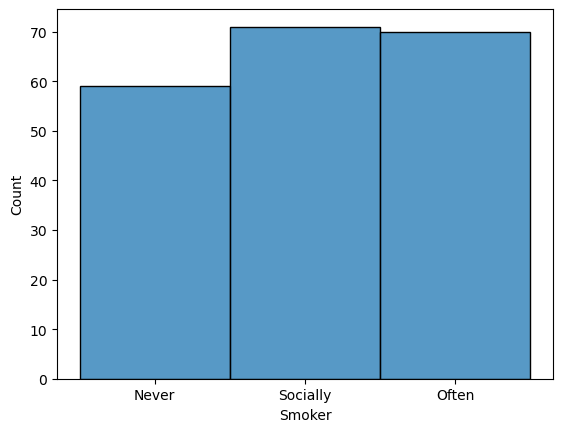

In [14]:
sns.histplot(x='Smoker',data=data,bins=5);

#### People are more socially smokers. 

### Sub plot

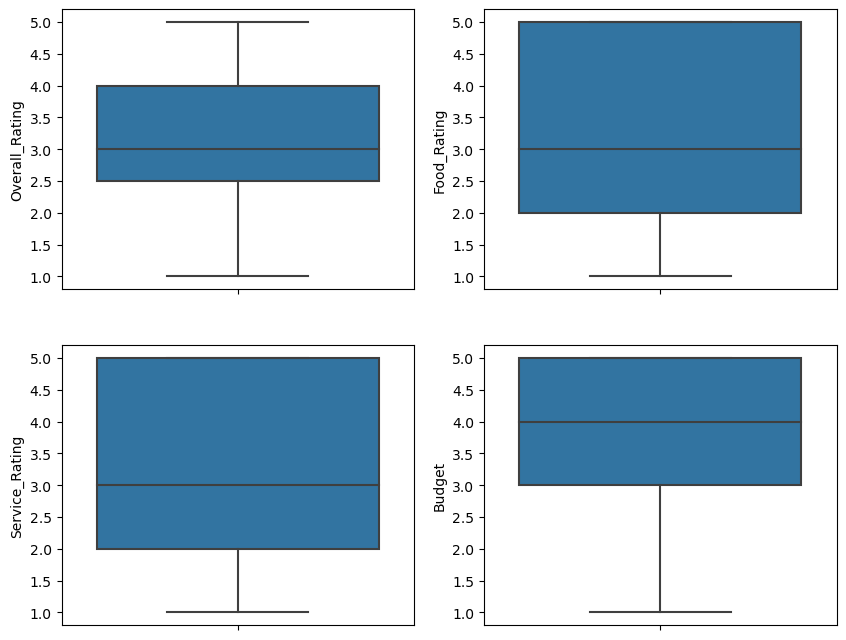

In [15]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.boxplot(data=data,y='Overall_Rating')
plt.subplot(2,2,2)
sns.boxplot(data=data,y='Food_Rating')
plt.subplot(2,2,3)
sns.boxplot(data=data,y='Service_Rating')
plt.subplot(2,2,4)
sns.boxplot(data=data,y='Budget')
plt.show()

### 6.histogram of overall rating

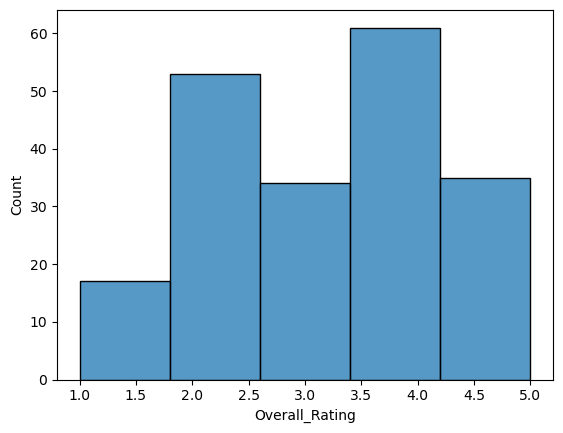

In [16]:
sns.histplot(x='Overall_Rating',data=data,bins=5);

#### majority of the people give 4 rating 

### 7.which age group used cuisines more ?

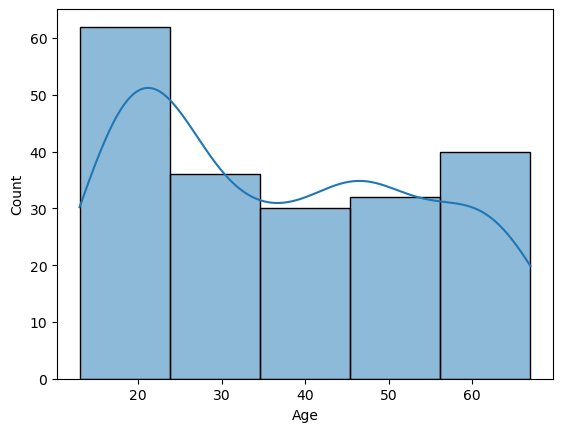

In [17]:
sns.histplot(data=data,x='Age',bins=5,kde=True);

#### 20 and below use more as compared to other

## Multivariate Analysis

### 8.which locality have large amount of smokers ?

In [18]:
pd.crosstab(data.Location,data.Smoker,margins=True)

Smoker,Never,Often,Socially,All
Location,,,,
"Cedar Hill, NY",0,0,2,2
"Central Park,NY",12,8,4,24
"Central Park,ny",2,0,6,8
"China Town, NY",7,7,8,22
"Market City, MY",0,2,0,2
"Market City, NY",2,10,8,20
"Riverdale,NY",6,11,11,28
"St. George,NY",17,16,13,46
"Upper East Side,NY",11,8,11,30


#### St. George,NY contains large amount of smokers in all three cases

### Count plot

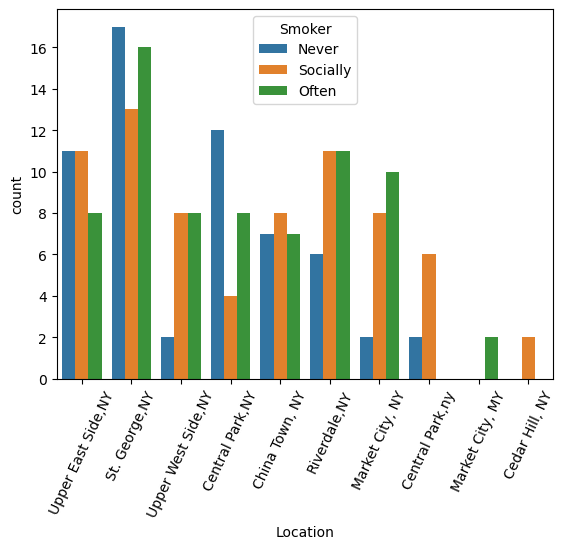

In [19]:
plt.xticks(rotation=65)
sns.countplot(x='Location',data=data,hue='Smoker');

In [20]:
St_GeorgeNY =data[data.Location=="St. George,NY"] 


<AxesSubplot:xlabel='Smoker', ylabel='count'>

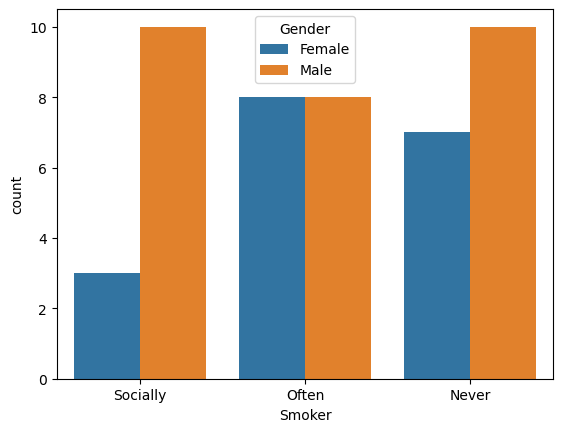

In [21]:
sns.countplot(x='Smoker', data=St_GeorgeNY, hue='Gender')

#### In St.George NY males are high smokers as compared to women. Males are dominated by women for socially and never cases.Here many of the non smokers are men.But in often case both of them are equal.  

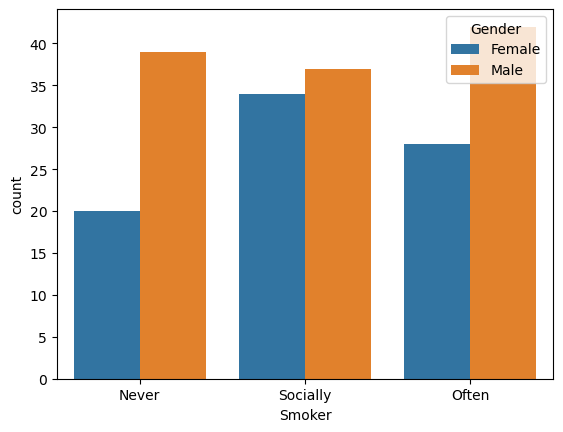

In [22]:
sns.countplot(x='Smoker', data=data, hue='Gender');

#### Smoking habit is high for men as compared to women.

### 9.Alcohol consumption among male and female

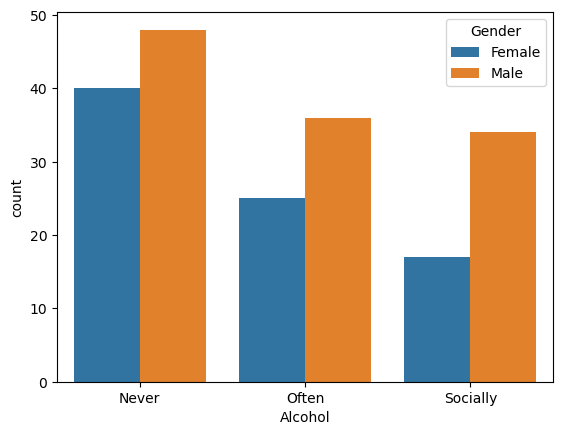

In [23]:
sns.countplot(x='Alcohol', data=data, hue='Gender');

#### alcohol consumption is high for men as compared to women

### 10.Creating a column named India.

In [24]:
Indian=data[data.Cuisines=='Indian']

In [25]:
Indian

,Location,Gender,Marital_Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food_Rating,Service_Rating,Overall_Rating,Often_AS,Age
1,"St. George,NY",Female,Married,Student,3,Indian,Never,Socially,1,1,1.0,No,31
6,"China Town, NY",Female,Married,Professional,5,Indian,Often,Socially,1,4,2.5,No,45
20,"St. George,NY",Female,Single,Student,3,Indian,Socially,Often,5,3,4.0,No,13
24,"Central Park,ny",Male,Single,Professional,3,Indian,Socially,Socially,2,5,3.5,No,59
26,"Central Park,NY",Female,Single,Student,3,Indian,Never,Socially,2,3,2.5,No,21
27,"China Town, NY",Male,Single,Student,5,Indian,Never,Never,1,5,3.0,No,22
31,"Market City, MY",Male,Married,Student,1,Indian,Never,Often,4,2,3.0,No,51
32,"Upper West Side,NY",Male,Single,Professional,3,Indian,Often,Never,3,2,2.5,No,27
33,"Central Park,ny",Female,Single,Professional,5,Indian,Socially,Socially,1,5,3.0,No,13
67,"Market City, NY",Male,Married,Professional,3,Indian,Never,Often,5,2,3.5,No,22


In [26]:
data.size

2600

### 11.correlation among different columns 

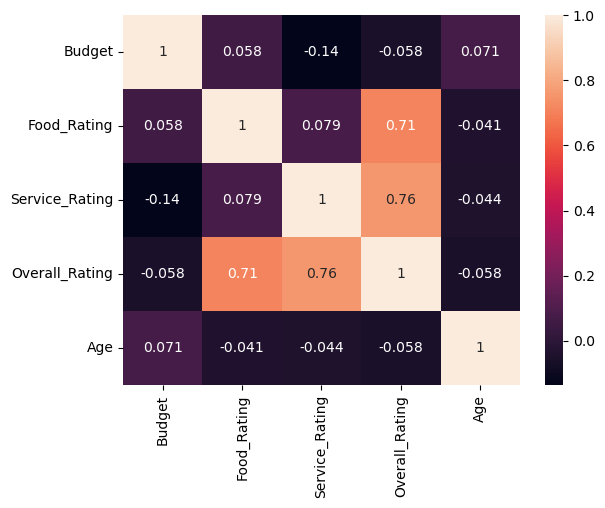

In [27]:
sns.heatmap(data.corr(),annot=True);

#### food rating and service rating are correlated 

### 12.considering one location

In [28]:
def sort_location(Location):
    data_location=data[data.Location==Location]
    data_location.drop(columns='Location',inplace=True)
    return data_location

In [29]:
sort_location('St. George,NY')

,Gender,Marital_Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food_Rating,Service_Rating,Overall_Rating,Often_AS,Age
1,Female,Married,Student,3,Indian,Never,Socially,1,1,1.0,No,31
10,Female,Married,Professional,4,French,Never,Often,3,2,2.5,No,47
11,Male,Married,Student,4,Chinese,Never,Socially,3,1,2.0,No,59
12,Female,Single,Professional,5,Chinese,Socially,Never,5,5,5.0,No,16
20,Female,Single,Student,3,Indian,Socially,Often,5,3,4.0,No,13
25,Male,Single,Professional,3,Japanese,Never,Socially,4,3,3.5,No,53
37,Female,Single,Student,5,French,Never,Never,3,2,2.5,No,32
39,Male,Single,Student,4,Filipino,Never,Never,3,1,2.0,No,36
42,Male,Married,Student,5,Japanese,Never,Never,3,1,2.0,No,37
44,Female,Married,Professional,3,Italian,Often,Never,4,1,2.5,No,53


### 13.barplot of budget compared to age

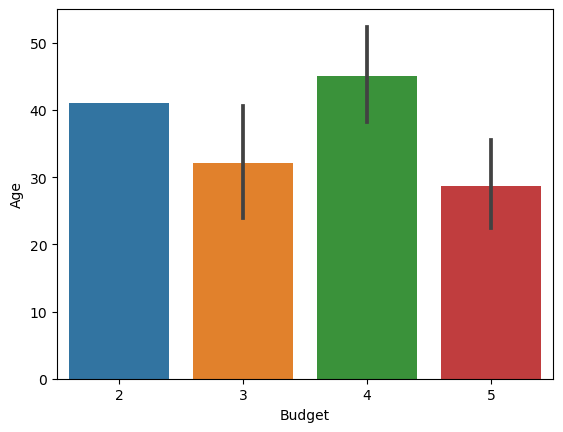

In [30]:
sns.barplot(x='Budget',y='Age',data=sort_location('St. George,NY'));

#### age of above 40 are more rich. 

### 14.either students or professional used more cuisine?

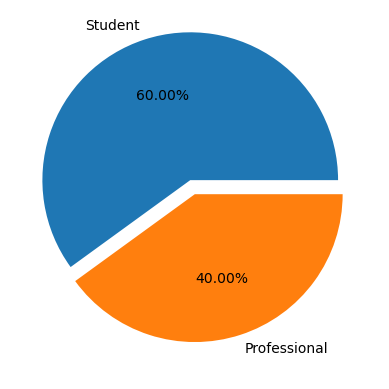

In [31]:
# category of customers
plt.pie(data=sort_location('St. George,NY'),\
       x=data.Activity.value_counts(),\
       explode=[0.1,0],\
       labels=['Student','Professional'],\
       autopct='%0.2f%%');

#### students used more than professionals

### 15.rating of indian food among diff ages

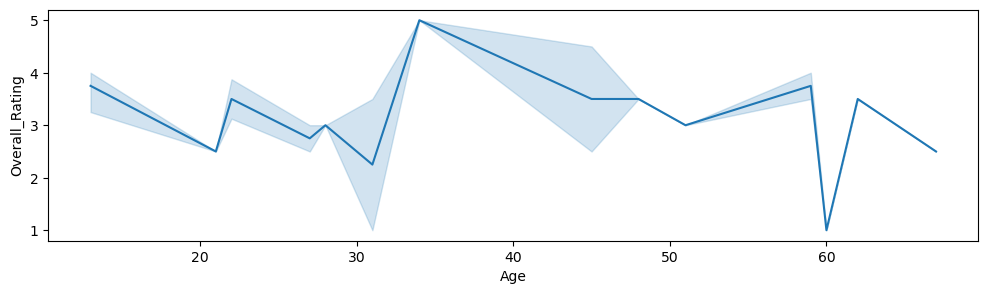

In [32]:
#rating of indian food among diff ages
plt.figure(figsize=(12,3))
plt.xlabel('Age')
plt.ylabel('Overall_Rating')
sns.lineplot(data=Indian,x='Age',y='Overall_Rating')
plt.show()

####   between 30-40 aged persons rated max for indian food

### 16.Scatter plot

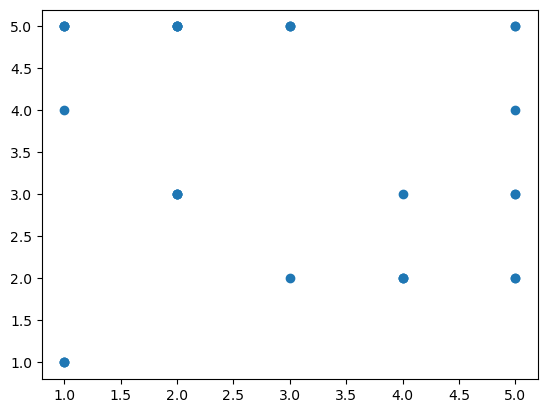

In [33]:
plt.scatter(data=Indian,x='Food_Rating',y='Service_Rating');


### 17.Reg plot

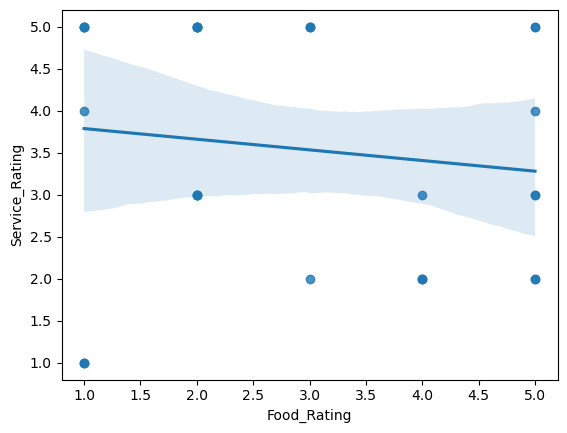

In [34]:
sns.regplot(data=Indian,x='Food_Rating',y='Service_Rating');

### 18.Pie chart

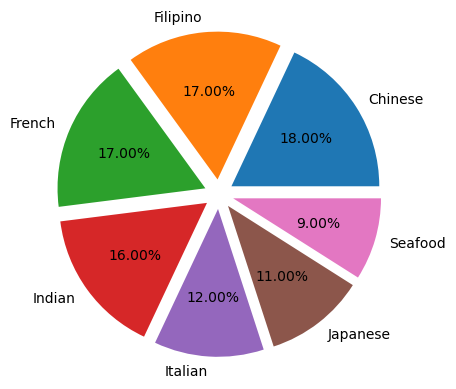

In [35]:
plt.pie(data=sort_location('St. George,NY'),\
       x=data.Cuisines.value_counts(),\
       explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1],\
       labels=['Chinese','Filipino','French','Indian','Italian','Japanese','Seafood'],\
       autopct='%0.2f%%');

### 19.cuisines preferred by persons in diff category

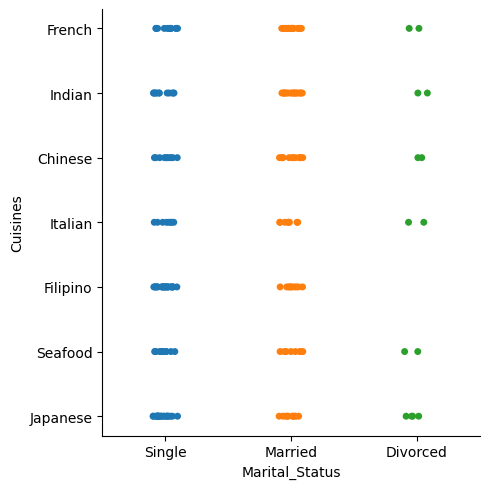

In [36]:
#cuisines preferred by persons in diff category
sns.catplot(data=data,x='Marital_Status',y='Cuisines');

#### divorced persons have less interest towards cuisines

### 20.rating of food among diffc ages and budget

### rel plot

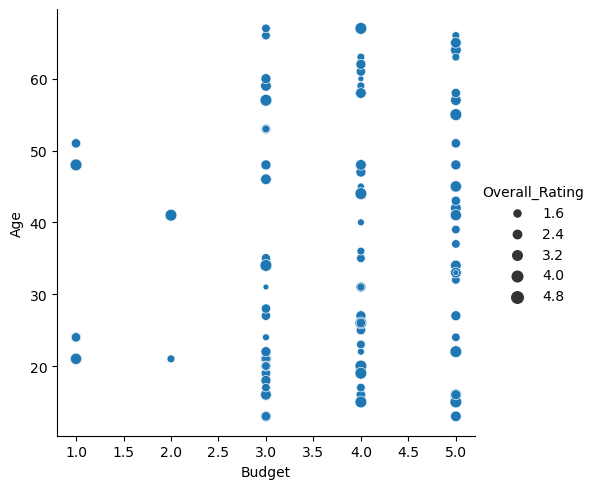

In [37]:
#rating of food among diffc ages and budget
sns.relplot(data=data,x='Budget',y='Age',size='Overall_Rating')
plt.show()

### 21.Violin plot

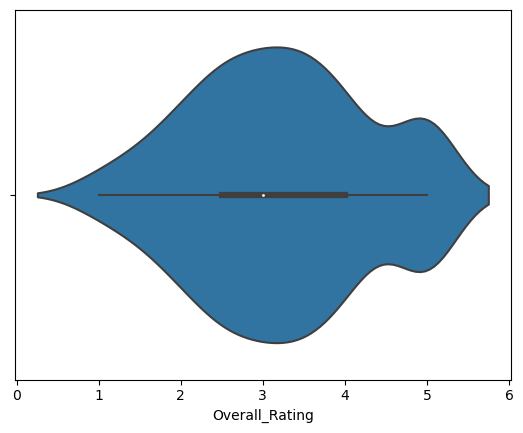

In [38]:
sns.violinplot(data=data,x='Overall_Rating')
plt.show()

### 22. Swarm plot

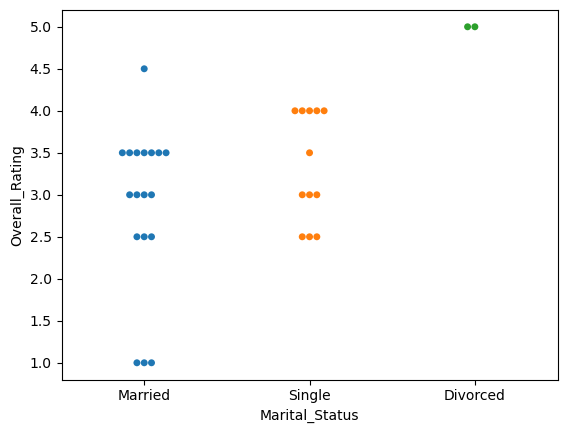

In [39]:
sns.swarmplot(data=Indian,x='Marital_Status',y='Overall_Rating');

### 23.Cat plot

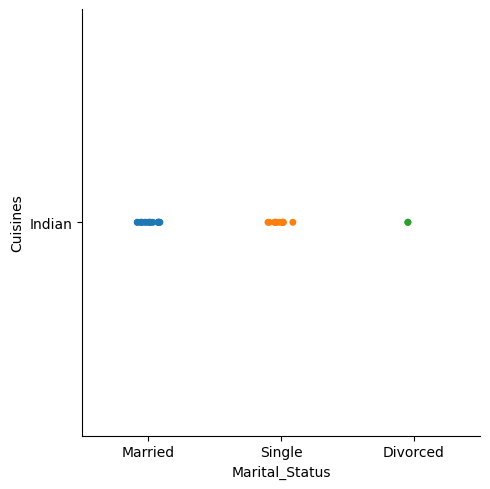

In [40]:
sns.catplot(data=Indian,x='Marital_Status',y='Cuisines');